In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
place = 'Den_Helder'  # 'Grad_Jablje' or 'Aarhus' or 'Den_Helder'
filename = 'data_' + place + '_array.json' 
file = open('C:/Users/Matej/ijs/PerceptiveSentinel/Utilities/DarkSkyGrabber/data/' + filename,'r')
json_text = file.read()
file.close()

In [3]:
data_list = json.JSONDecoder().decode(json_text)

In [4]:
df0 = pd.DataFrame(data_list);
pd.set_option('display.max_columns', 500)
df0[:5]

,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,cloudCover,cloudCoverError,dewPoint,humidity,icon,moonPhase,ozone,precipAccumulation,precipIntensity,precipIntensityError,precipIntensityMax,precipIntensityMaxError,precipIntensityMaxTime,precipProbability,precipType,pressure,pressureError,summary,sunriseTime,sunsetTime,temperatureHigh,temperatureHighError,temperatureHighTime,temperatureLow,temperatureLowError,temperatureLowTime,temperatureMax,temperatureMaxError,temperatureMaxTime,temperatureMin,temperatureMinError,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed
0,7.69,1451649600,0.37,1451718000,7.69,1451649600,1.38,1451674800,0.66,NaN,4.49,0.88,partly-cloudy-day,0.73,NaN,NaN,0.0025,NaN,0.0330,NaN,1.451610e+09,0.18,rain,1021.56,NaN,Mostly cloudy throughout the day.,1451634915,1451662532,8.29,NaN,1451649600,4.91,NaN,1451718000,8.29,NaN,1451649600,3.56,NaN,1451638800,1451602800,NaN,NaN,9.03,154,7.80,1.451606e+09,1.46
1,1.02,1451757600,-0.01,1451782800,1.47,1451692800,0.27,1451772000,0.84,NaN,3.97,0.93,partly-cloudy-day,0.76,NaN,NaN,0.0432,NaN,0.3200,NaN,1.451732e+09,0.63,rain,1009.60,NaN,Mostly cloudy throughout the day.,1451721306,1451748996,5.13,NaN,1451754000,4.82,NaN,1451790000,5.26,NaN,1451689200,4.79,NaN,1451732400,1451689200,NaN,NaN,8.03,119,9.63,1.451768e+09,6.38
2,4.48,1451826000,-0.31,1451887200,4.48,1451826000,-0.01,1451782800,0.64,NaN,5.15,0.94,rain,0.79,NaN,NaN,0.3378,NaN,1.3335,NaN,1.451812e+09,0.96,rain,999.27,NaN,Light rain in the morning.,1451807693,1451835464,7.32,NaN,1451811600,3.93,NaN,1451890800,7.32,NaN,1451811600,4.82,NaN,1451790000,1451775600,NaN,NaN,6.63,132,12.20,1.451794e+09,6.15
3,0.07,1451890800,-3.12,1451937600,0.76,1451869200,-3.12,1451937600,0.73,NaN,2.77,0.96,fog,0.82,NaN,NaN,0.2438,NaN,0.8992,NaN,1.451884e+09,0.90,rain,987.97,NaN,Foggy starting in the afternoon.,1451894077,1451921934,4.01,NaN,1451887200,1.89,NaN,1451937600,5.14,NaN,1451862000,1.89,NaN,1451937600,1451862000,NaN,NaN,4.41,118,9.79,1.451862e+09,5.61
4,1.75,1451991600,-5.51,1452052800,1.75,1451991600,-4.37,1452031200,0.74,NaN,2.68,0.97,fog,0.85,NaN,NaN,0.0660,NaN,0.5385,NaN,1.451948e+09,0.88,rain,990.91,NaN,Foggy throughout the day.,1451980457,1452008407,4.68,NaN,1451991600,-0.60,NaN,1452063600,4.68,NaN,1451991600,0.81,NaN,1452031200,1451948400,NaN,NaN,2.75,111,8.00,1.452028e+09,4.64


In [5]:
df0 = pd.DataFrame(data_list);
drop = [ 'apparentTemperatureHigh',
         'apparentTemperatureLow',
        'apparentTemperatureHighTime',
        'apparentTemperatureLowTime',
        'apparentTemperatureMax',
        'apparentTemperatureMaxTime',
        'apparentTemperatureMin',
        'apparentTemperatureMinTime',
        'cloudCoverError',
        'icon',
        'ozone',
        'precipIntensityMaxTime',
        'pressureError',
        'summary',
        'temperatureMaxError',
        'uvIndexTime',
        'visibility',
        'windBearing',
        'windGust',
        'windGustTime',
        'precipType',
        'moonPhase',
        'sunriseTime',
        'sunsetTime',
        'temperatureHighTime',
        'temperatureLowTime',
        'temperatureMaxTime',
        'temperatureMinTime',
        'temperatureMax',
        'temperatureMin',
        'precipAccumulation',
        'uvIndex',
       ]
data_list = [
        'cloudCover',
        'dewPoint',
        'humidity',
        'precipIntensity',
        'precipIntensityMax',
        'precipProbability',
        'pressure',
        'temperatureHigh',
        'temperatureLow',
        'windSpeed'
        ]

df0['time'] = pd.to_datetime(df0['time'] + 2*60*60,unit='s').dt.round('1d');
df = df0.set_index('time').loc[:, data_list]
#df = df0.drop(drop,1).set_index('time');

In [6]:
columns_order = [ 'cloudCover',
 'humidity',
 'precipIntensity',
 'precipIntensityMax',
 'precipProbability',
 'windSpeed',
 'pressure',
 'dewPoint',
 'temperatureHigh',
 'temperatureLow',
]
df = df[columns_order]

In [7]:
pd.set_option('display.max_columns', 500)
df[:10]

,cloudCover,humidity,precipIntensity,precipIntensityMax,precipProbability,windSpeed,pressure,dewPoint,temperatureHigh,temperatureLow
time,,,,,,,,,,
2016-01-01,0.66,0.88,0.0025,0.0330,0.18,1.46,1021.56,4.49,8.29,4.91
2016-01-02,0.84,0.93,0.0432,0.3200,0.63,6.38,1009.60,3.97,5.13,4.82
2016-01-03,0.64,0.94,0.3378,1.3335,0.96,6.15,999.27,5.15,7.32,3.93
2016-01-04,0.73,0.96,0.2438,0.8992,0.90,5.61,987.97,2.77,4.01,1.89
2016-01-05,0.74,0.97,0.0660,0.5385,0.88,4.64,990.91,2.68,4.68,-0.60
2016-01-06,0.79,0.96,0.0203,0.1168,0.65,4.62,999.20,-0.62,0.14,0.06
2016-01-07,0.78,0.95,0.4039,2.2479,0.96,3.35,990.41,2.89,7.13,6.75
2016-01-08,0.52,0.79,0.0660,1.0490,0.43,5.79,997.76,3.28,8.97,2.84
2016-01-09,0.85,0.95,0.0025,0.0381,0.15,4.26,996.70,4.48,6.69,6.33


In [8]:
df.describe()

,cloudCover,humidity,precipIntensity,precipIntensityMax,precipProbability,windSpeed,pressure,dewPoint,temperatureHigh,temperatureLow
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,0.702057,0.790085,0.082998,0.429666,0.352078,3.525270,1014.771782,7.286755,13.427306,8.748611
std,0.185889,0.087112,0.142543,0.724279,0.315424,1.931831,9.919906,5.685700,6.683974,5.720487
min,0.110000,0.500000,0.000000,0.000000,0.000000,0.060000,983.110000,-12.400000,-4.990000,-7.570000
25%,0.620000,0.730000,0.000000,0.012700,0.000000,2.075000,1009.280000,3.135000,8.015000,4.400000
50%,0.740000,0.790000,0.015200,0.132100,0.280000,3.270000,1015.670000,7.240000,12.930000,8.470000
75%,0.830000,0.860000,0.096500,0.546100,0.590000,4.680000,1021.205000,11.980000,19.085000,13.865000
max,1.000000,0.990000,1.122700,7.703800,1.000000,11.470000,1043.500000,20.640000,33.910000,24.800000


In [9]:
list_of_names = df.columns.tolist()

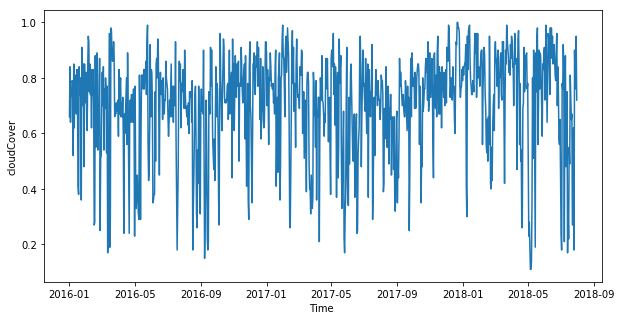

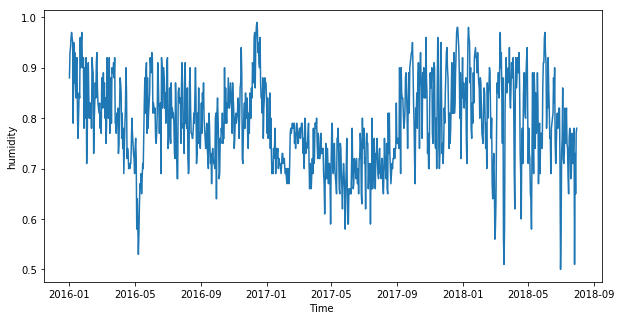

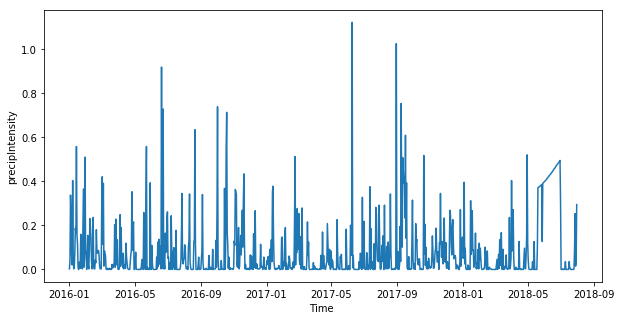

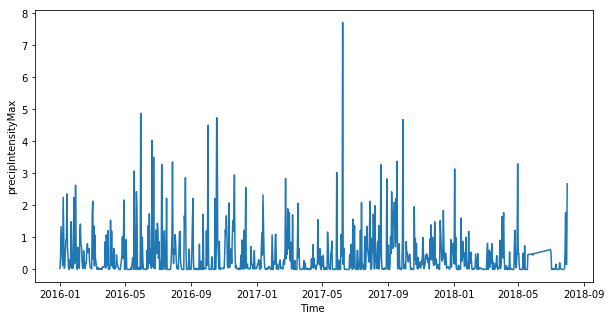

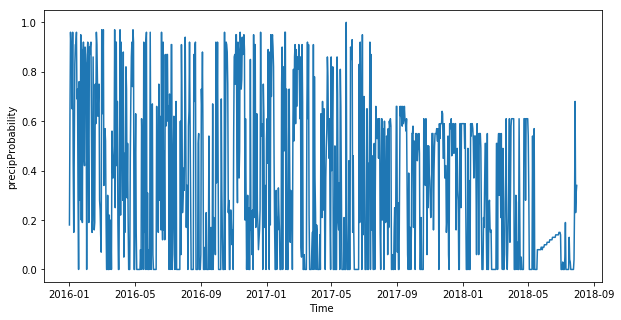

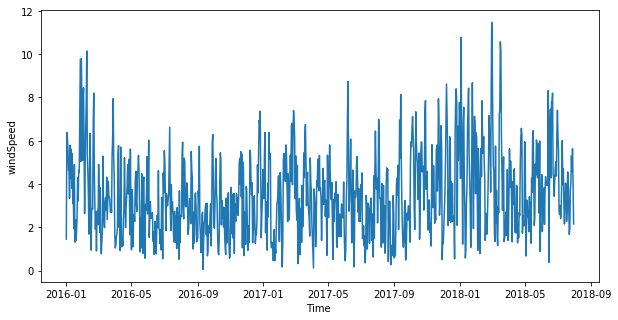

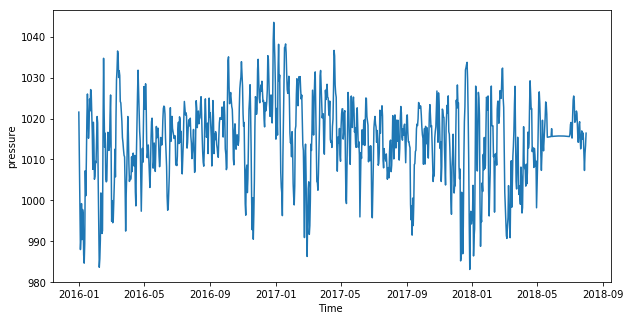

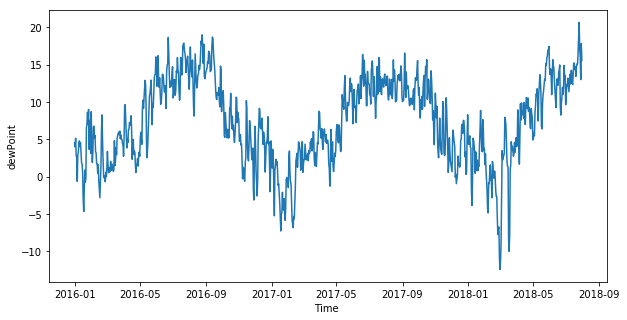

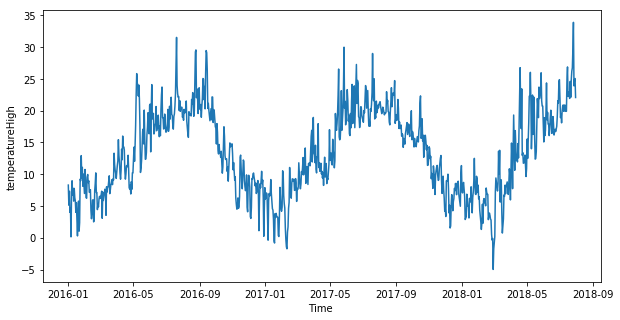

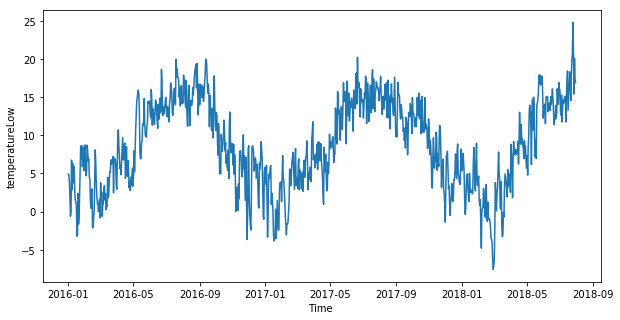

In [10]:
for i in list_of_names:
    fig, ax = plt.subplots();
    fig.set_size_inches(10, 5)
    ax.plot(df.index, df[i])
    
    plt.xlabel('Time ')
    plt.ylabel(i)
    plt.show();
    
    #fig.savefig('./graphs/' + place + '_' + i + '.png', dpi=300)

In [11]:
df.corr()

,cloudCover,humidity,precipIntensity,precipIntensityMax,precipProbability,windSpeed,pressure,dewPoint,temperatureHigh,temperatureLow
cloudCover,1.000000,0.400725,0.211442,0.171594,0.306358,0.195071,-0.224617,-0.093288,-0.299947,-0.138239
humidity,0.400725,1.000000,0.198050,0.187836,0.281241,-0.035806,-0.137289,0.065896,-0.281428,-0.156050
precipIntensity,0.211442,0.198050,1.000000,0.775345,0.438752,0.196117,-0.328339,0.170900,0.058604,0.132438
precipIntensityMax,0.171594,0.187836,0.775345,1.000000,0.617903,0.135180,-0.352592,0.122786,0.016152,0.077744
precipProbability,0.306358,0.281241,0.438752,0.617903,1.000000,0.216690,-0.461308,-0.103644,-0.255212,-0.149087
windSpeed,0.195071,-0.035806,0.196117,0.135180,0.216690,1.000000,-0.298340,-0.139596,-0.191169,-0.098966
pressure,-0.224617,-0.137289,-0.328339,-0.352592,-0.461308,-0.298340,1.000000,-0.027117,0.046700,0.007011
dewPoint,-0.093288,0.065896,0.170900,0.122786,-0.103644,-0.139596,-0.027117,1.000000,0.919549,0.931600
temperatureHigh,-0.299947,-0.281428,0.058604,0.016152,-0.255212,-0.191169,0.046700,0.919549,1.000000,0.933238
temperatureLow,-0.138239,-0.156050,0.132438,0.077744,-0.149087,-0.098966,0.007011,0.931600,0.933238,1.000000


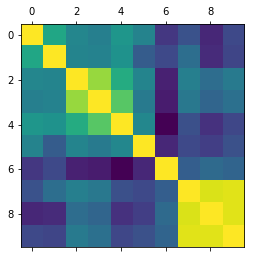

In [12]:
plt.matshow(df.corr())
plt.show()